In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations
from scipy.stats import ttest_ind
%matplotlib inline

In [8]:
pd.set_option('display.max_rows', 50)  # показывать больше строк
pd.set_option('display.max_columns', 50)  # показывать больше колонок

In [484]:
df = pd.read_csv('stud_math.csv')

In [4]:
df.sample(10)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
235,GP,M,16,U,NaN,T,3.0,2.0,at_home,other,...,-9.0,yes,yes,yes,5.0,3.0,3.0,2.0,10.0,50.0
9,GP,M,15,U,NaN,NaN,3.0,4.0,other,other,...,-6.0,yes,yes,no,5.0,5.0,1.0,5.0,0.0,75.0
233,GP,M,16,U,GT3,T,4.0,4.0,health,other,...,-6.0,yes,yes,no,4.0,2.0,4.0,1.0,2.0,65.0
217,GP,M,18,U,LE3,T,3.0,3.0,services,health,...,-6.0,yes,yes,no,NaN,2.0,4.0,4.0,13.0,40.0
53,GP,F,15,U,GT3,T,4.0,4.0,services,services,...,-3.0,yes,yes,no,3.0,3.0,4.0,5.0,0.0,55.0
340,GP,F,19,U,GT3,T,2.0,1.0,services,services,...,-9.0,yes,NaN,yes,4.0,3.0,4.0,3.0,4.0,55.0
36,GP,M,15,U,NaN,T,4.0,3.0,teacher,services,...,-9.0,yes,yes,no,5.0,4.0,3.0,4.0,2.0,90.0
122,GP,F,16,U,LE3,T,2.0,4.0,other,health,...,-6.0,yes,yes,yes,4.0,2.0,2.0,5.0,2.0,65.0
357,MS,F,17,U,LE3,NaN,3.0,2.0,services,other,...,-6.0,yes,no,yes,1.0,2.0,3.0,5.0,2.0,55.0
226,GP,F,17,U,GT3,T,3.0,2.0,other,other,...,-6.0,yes,yes,no,5.0,3.0,4.0,3.0,10.0,75.0


In [470]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   school               395 non-null    object 
 1   sex                  395 non-null    object 
 2   age                  395 non-null    int64  
 3   address              378 non-null    object 
 4   famsize              368 non-null    object 
 5   Pstatus              350 non-null    object 
 6   Medu                 392 non-null    float64
 7   Fedu                 371 non-null    float64
 8   Mjob                 376 non-null    object 
 9   Fjob                 359 non-null    object 
 10  reason               378 non-null    object 
 11  guardian             364 non-null    object 
 12  traveltime           367 non-null    float64
 13  studytime            388 non-null    float64
 14  failures             373 non-null    float64
 15  schoolsup            386 non-null    obj

В таблице 13 числовых и 17 номинативных столбцов. Имеются пропуски.

In [10]:
df.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'studytime, granular', 'higher', 'internet', 'romantic', 'famrel',
       'freetime', 'goout', 'health', 'absences', 'score'],
      dtype='object')

Список столбцов показал, что названия столбцов корректировать не надо. 


In [532]:
#Разобьем наши столбцы на 2 категории:
nominative_columns = ['school', 'sex',  'address', 'famsize', 'Pstatus',
                      'Mjob', 'Fjob', 'reason', 'guardian',  'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
                      'higher', 'internet', 'romantic']
quantative_columns = ['age',  'Medu', 'Fedu', 'traveltime', 'studytime', 'failures',
                      'studytime, granular',  'famrel', 'freetime', 'goout', 'health', 'absences', 'score']


In [5]:
df.describe()

,age,Medu,Fedu,traveltime,studytime,failures,"studytime, granular",famrel,freetime,goout,health,absences,score
count,395.000000,392.000000,371.000000,367.000000,388.000000,373.000000,388.000000,368.000000,384.000000,387.000000,380.000000,383.000000,389.000000
mean,16.696203,2.750000,2.614555,1.438692,2.038660,0.337802,-6.115979,3.937500,3.231771,3.105943,3.531579,7.279373,52.262211
std,1.276043,1.098127,2.228732,0.694181,0.842078,0.743135,2.526235,0.927277,0.993940,1.115896,1.396019,23.465197,22.919022
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,-12.000000,-1.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,-6.000000,4.000000,3.000000,2.000000,3.000000,0.000000,40.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,-6.000000,4.000000,3.000000,3.000000,4.000000,4.000000,55.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,-3.000000,5.000000,4.000000,4.000000,5.000000,8.000000,70.000000
max,22.000000,4.000000,40.000000,4.000000,4.000000,3.000000,-3.000000,5.000000,5.000000,5.000000,5.000000,385.000000,100.000000


здесь мы видим диапазон данных по каждому столбцу. При этом есть столбец 'studytime, granular' , с отрицательными значениями и которого нет в описании. По минимальному значению есть неверные данные по famrel (должно 1-5), по максимальному значению есть неверные данные Fedu (должно 0-4) и вопрос по absence (max =385)

In [299]:
# Функция по определению выбросов
def outliers(col):
    # найдем межквартильное расстояние
    IQR = df[col].quantile(0.75) - df[col].quantile(0.25)
    perc25 = df[col].quantile(0.25)
    perc75 = df[col].quantile(0.75)
    print(f"Границы выбросов: [{perc25 - 1.5*IQR}, {perc75 + 1.5*IQR}].")
    print(
        f'Количество выбросов {len(df[col].loc[df[col].lt(perc25 - 1.5*IQR) | df[col].gt(perc75 + 1.5*IQR)])}')

In [314]:
# Функция первичного осмотра столбца
def first_look_col(col):
    print(col)
    if col in nominative_columns:
        # Если качественный параметр, то только гистограмма, иначе добавляем boxplot
        df[col].dropna().hist(bins=10)
    else:
        fig, axes = plt.subplots(1, 2, figsize=(12, 4))
        data = df[col].dropna()
        axes[0].hist(data, bins=10)
        axes[0].set_title('distribution')
        axes[1].boxplot(data)
        axes[1].set_title('Box plot')

        outliers(col)  # Проверка выбросов

    print(f"Всего пропусков {df[col].isna().sum()}, это {df[col].isna().sum()/len(df):.1%}")

    plt.show()

school
Всего пропусков 0, это 0.0%


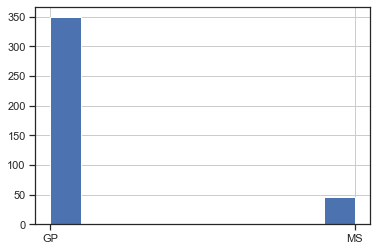

sex
Всего пропусков 0, это 0.0%


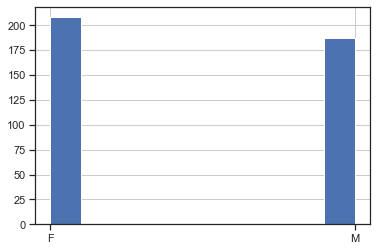

age
Границы выбросов: [13.0, 21.0].
Количество выбросов 1
Всего пропусков 0, это 0.0%


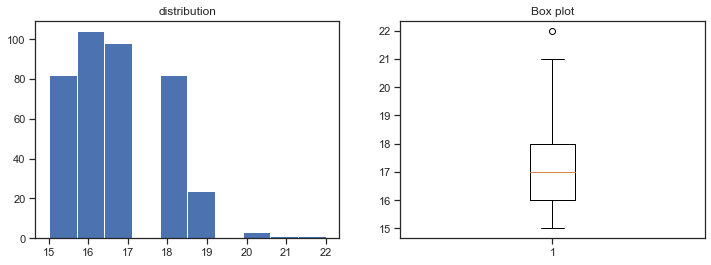

address
Всего пропусков 17, это 4.3%


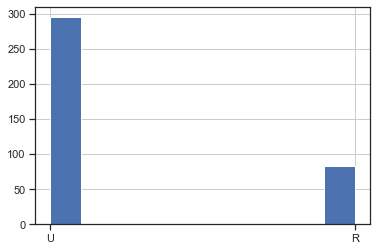

famsize
Всего пропусков 27, это 6.8%


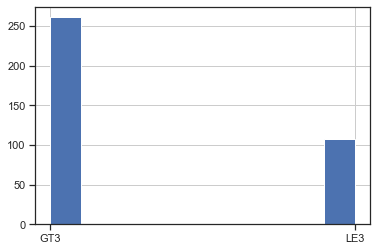

Pstatus
Всего пропусков 45, это 11.4%


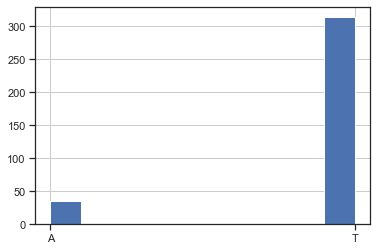

Medu
Границы выбросов: [-1.0, 7.0].
Количество выбросов 0
Всего пропусков 3, это 0.8%


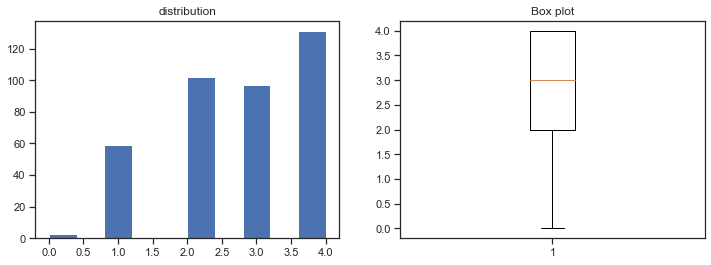

Fedu
Границы выбросов: [0.5, 4.5].
Количество выбросов 3
Всего пропусков 24, это 6.1%


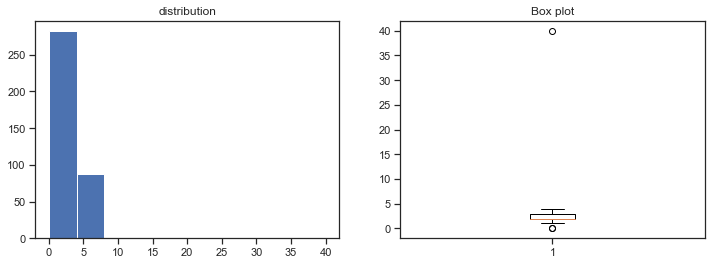

Mjob
Всего пропусков 19, это 4.8%


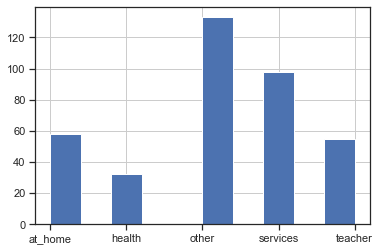

Fjob
Всего пропусков 36, это 9.1%


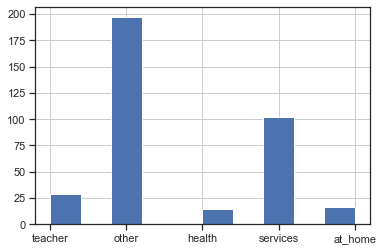

reason
Всего пропусков 17, это 4.3%


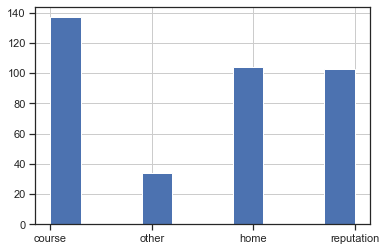

guardian
Всего пропусков 31, это 7.8%


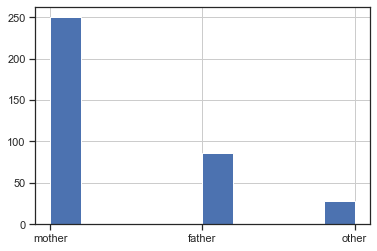

traveltime
Границы выбросов: [-0.5, 3.5].
Количество выбросов 7
Всего пропусков 28, это 7.1%


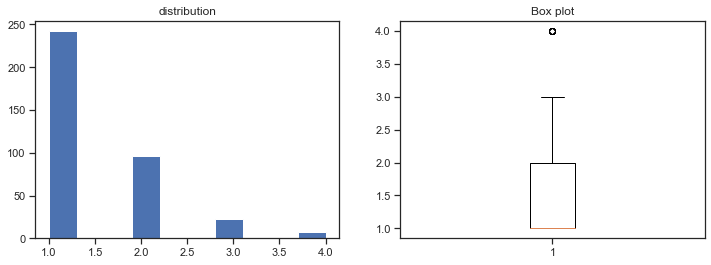

studytime
Границы выбросов: [-0.5, 3.5].
Количество выбросов 27
Всего пропусков 7, это 1.8%


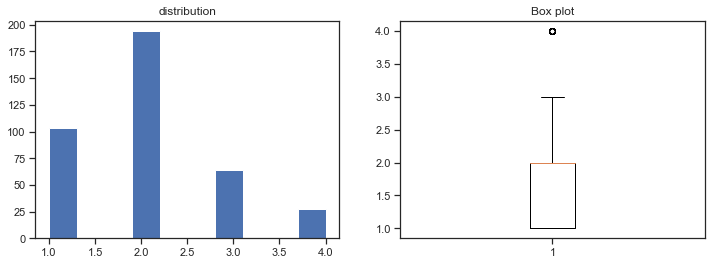

failures
Границы выбросов: [0.0, 0.0].
Количество выбросов 80
Всего пропусков 22, это 5.6%


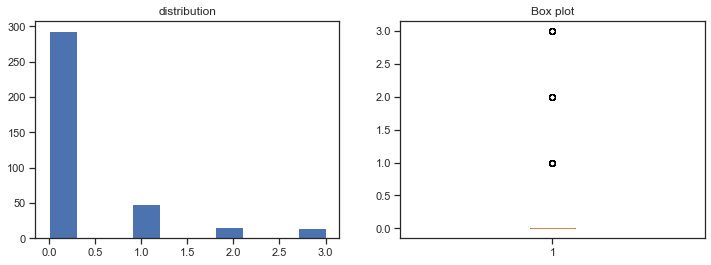

schoolsup
Всего пропусков 9, это 2.3%


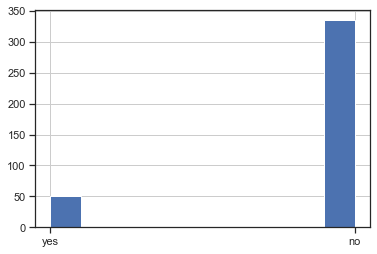

famsup
Всего пропусков 39, это 9.9%


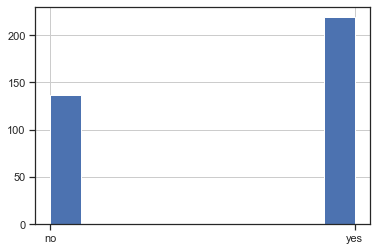

paid
Всего пропусков 40, это 10.1%


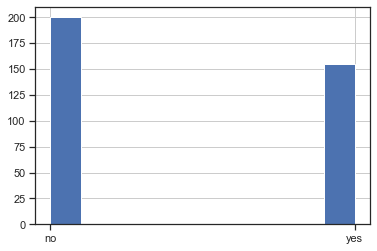

activities
Всего пропусков 14, это 3.5%


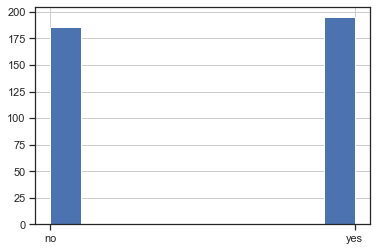

nursery
Всего пропусков 16, это 4.1%


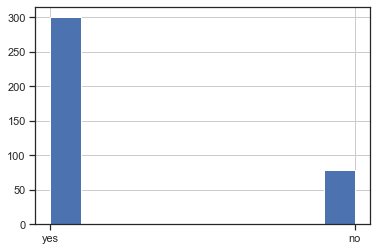

studytime, granular
Границы выбросов: [-10.5, 1.5].
Количество выбросов 27
Всего пропусков 7, это 1.8%


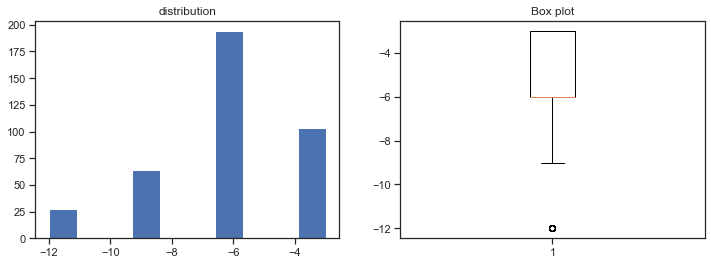

higher
Всего пропусков 20, это 5.1%


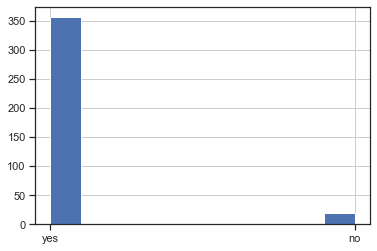

internet
Всего пропусков 34, это 8.6%


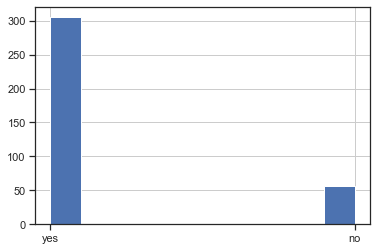

romantic
Всего пропусков 31, это 7.8%


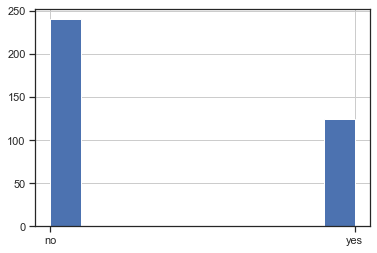

famrel
Границы выбросов: [2.5, 6.5].
Количество выбросов 25
Всего пропусков 27, это 6.8%


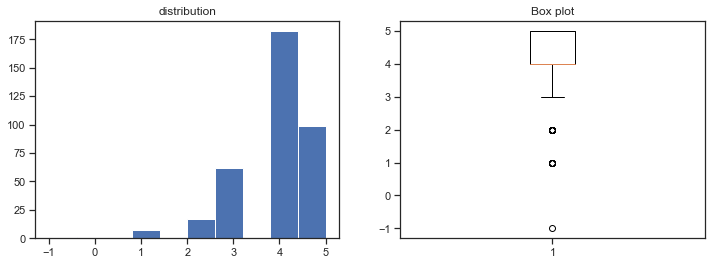

freetime
Границы выбросов: [1.5, 5.5].
Количество выбросов 18
Всего пропусков 11, это 2.8%


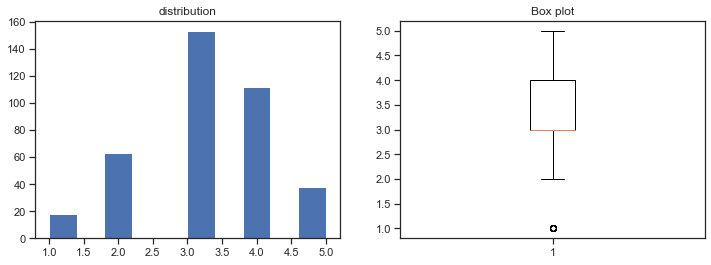

goout
Границы выбросов: [-1.0, 7.0].
Количество выбросов 0
Всего пропусков 8, это 2.0%


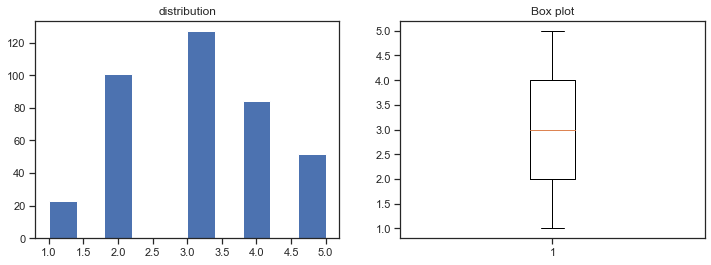

health
Границы выбросов: [0.0, 8.0].
Количество выбросов 0
Всего пропусков 15, это 3.8%


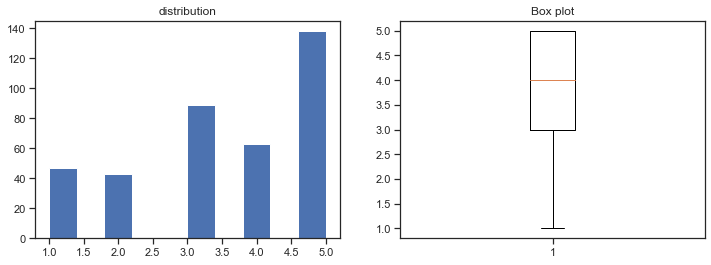

absences
Границы выбросов: [-12.0, 20.0].
Количество выбросов 17
Всего пропусков 12, это 3.0%


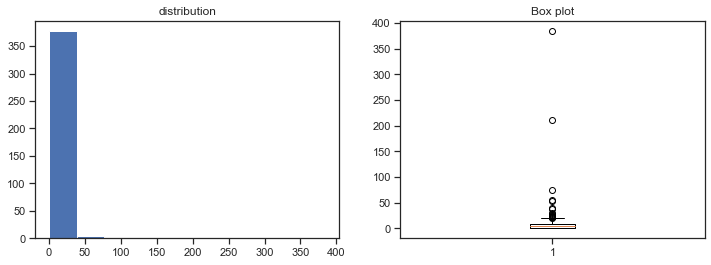

score
Границы выбросов: [-5.0, 115.0].
Количество выбросов 0
Всего пропусков 6, это 1.5%


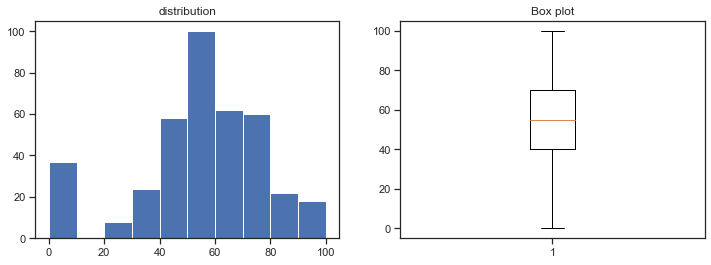

In [315]:
for col in df.columns:
    first_look_col(col)

Замечания:
school: есть дисбаланс групп
age: при медиане 17 имеется один выброс 22 
address: есть дисбаланс групп, пропуски не существенные
Pstatus:есть дисбаланс групп
Fedu: имеются выбросы выше лимита по условию
failures: практически все на уровне 0
schoolsup:есть дисбаланс групп
studytime и studytime, granular: графики очень похожи, перевернуты
higher: есть дисбаланс групп
internet: есть дисбаланс групп
famrel: имеются выбросы ниже лимита по условию
absences: практически все на уровне 0, при этом есть 2 сильных выброса 
score: распрелено практически нормально если брать от 20 до 100, от 0 до 20 пробел говорит, что вероятно нижний порог на экзамене 20 .  Пропусков 6, это 1.5%

# корректировка данных к лимитам по условию

In [471]:
df.Fedu = df.Fedu.replace(40, 4)
df.famrel = df.famrel.replace(-1, 1)
# сгладим немного выбросы по absences
df.loc[df['absences'] > 50, ['absences']] = 50

In [401]:
#посмотрим 'studytime', 'studytime, granular'
df_study = df[['studytime', 'studytime, granular']]
df_study.corr()

,studytime,"studytime, granular"
studytime,1.0,-1.0
"studytime, granular",-1.0,1.0


## Корреляция 1 , таким образом мы можем удалить 'studytime, granular'

In [489]:
df.drop('studytime, granular',inplace=True, axis=1)


In [490]:
#удалим пропуски в целевой переменной
df.dropna(subset=['score'],inplace=True)

Поскольку по другим признакам процент пропусков небольшой, то оставим пока как есть

# посмотрим корреляцию между количественными признаками


In [530]:
df_number= df[['age',  'Medu', 'Fedu', 'traveltime', 'studytime', 'failures',
                        'famrel', 'freetime', 'goout', 'health', 'absences', 'score']]


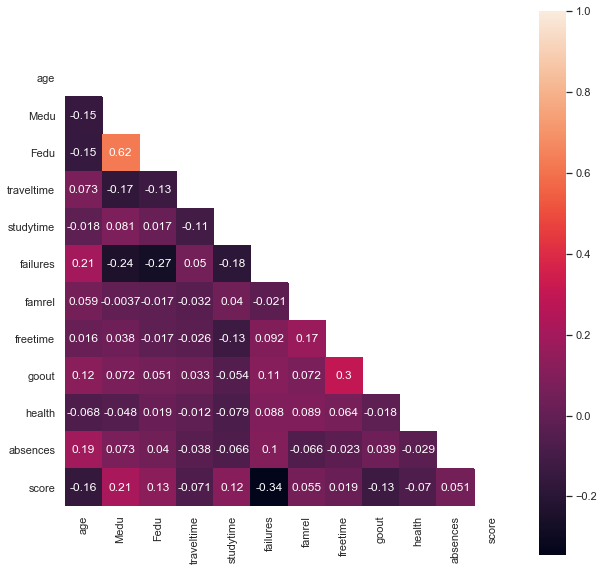

In [491]:
#corr = np.corrcoef(df3.corr())
corr = df_number.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(10, 10))
    ax = sns.heatmap(corr, mask=mask, annot=True, square=True)
    

тепловая карта показала очень сильную корреляцию между Medu и Fedu. Это можно использовать для взаимного заполнения пропусков

In [494]:
abs(corr.score).sort_values(ascending=False)

score         1.000000
failures      0.344338
Medu          0.213349
age           0.155726
Fedu          0.130923
goout         0.129685
studytime     0.115741
traveltime    0.070559
health        0.070460
famrel        0.055305
absences      0.051299
freetime      0.019026
Name: score, dtype: float64

# Можем оставить только признаки с корреляцией к целевой функции >0.1


In [511]:
corr.score[abs(corr.score)>0.1].index

Index(['age', 'Medu', 'Fedu', 'studytime', 'failures', 'goout', 'score'], dtype='object')

# Заполнение пропусков

In [492]:
#заполним пропуски Medu и Fedu
df.Medu = df.Medu.where(df.Medu.notna(),df.Fedu)
df.Fedu = df.Fedu.where(df.Fedu.notna(),df.Medu)

In [538]:
# для количественных признаков заполним медианой, а для качественных модой
def fill_median(x):
    return x.fillna(x.median(), inplace=True)

def fill_mode(x):
    return x.fillna(x.mode()[0], inplace=True)

In [539]:
for col in df.columns:
    if col in nominative_columns:
        fill_mode(df[col])
    elif col in quantative_columns:
        fill_median(df[col])

# Анализ номинативных переменных

In [504]:
def get_boxplot(column):
    fig, ax = plt.subplots(figsize=(10, 4))
    sns.boxplot(x=column, y='score',
                data=df.loc[df.loc[:, column].isin(
                    df.loc[:, column].value_counts().index[:10])],
                ax=ax)
    plt.xticks(rotation=45)
    ax.set_title('Boxplot for ' + column)
    plt.show()

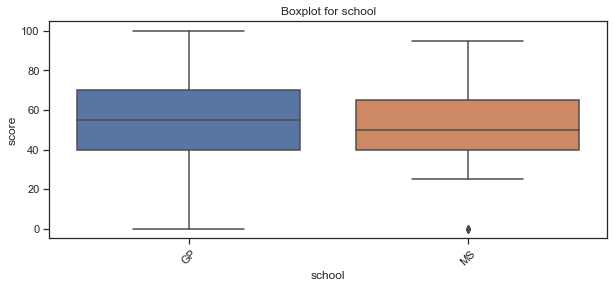

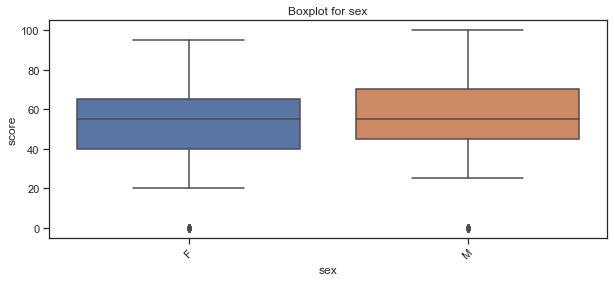

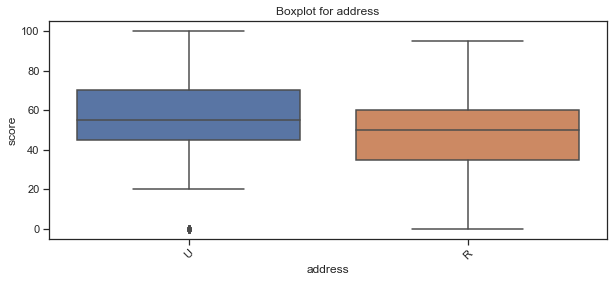

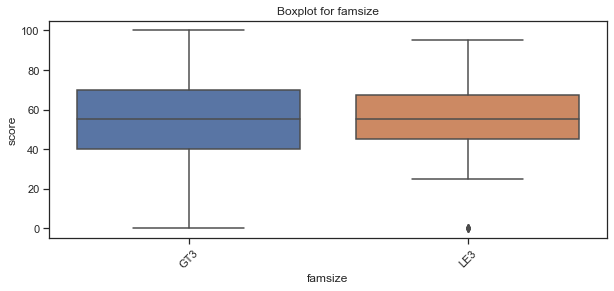

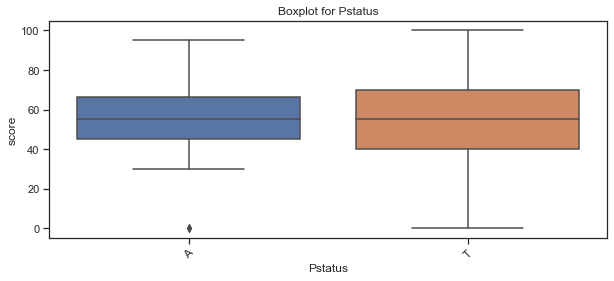

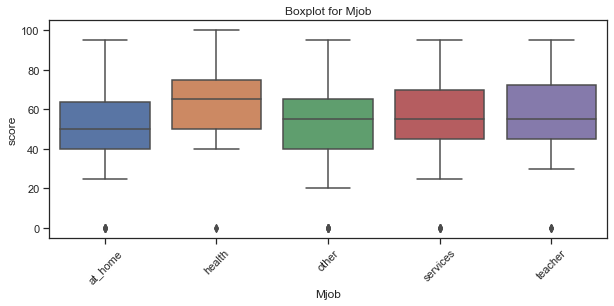

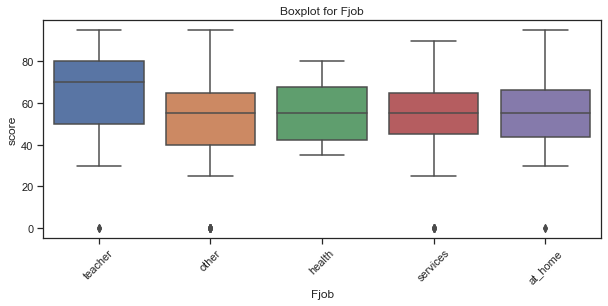

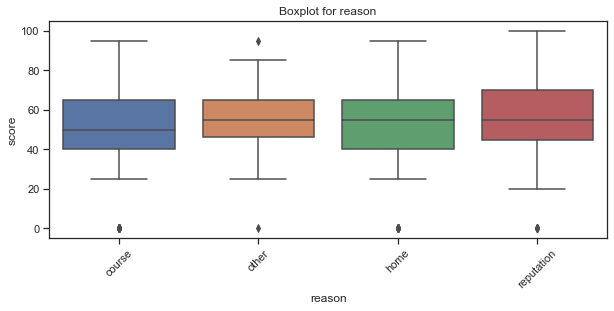

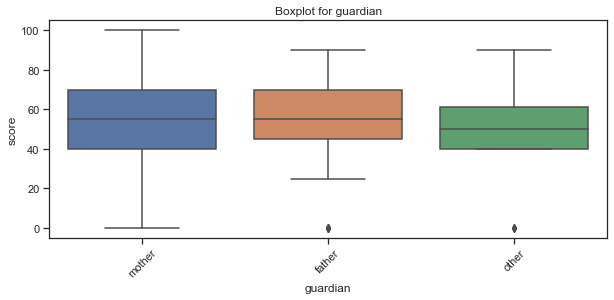

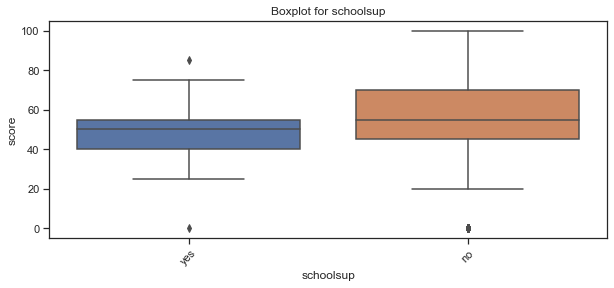

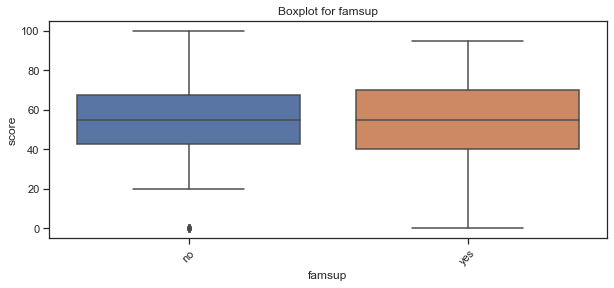

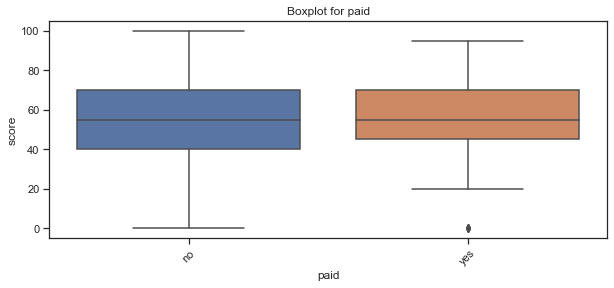

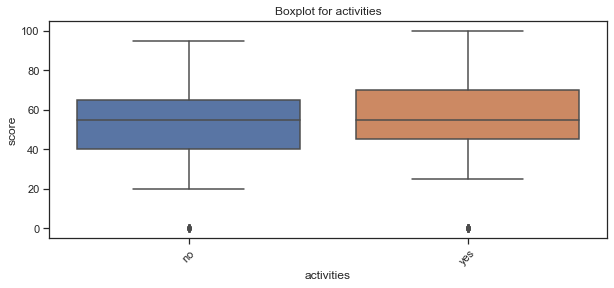

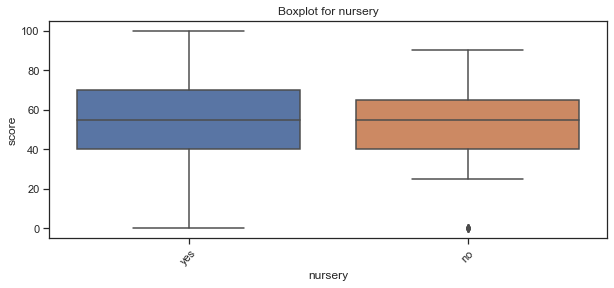

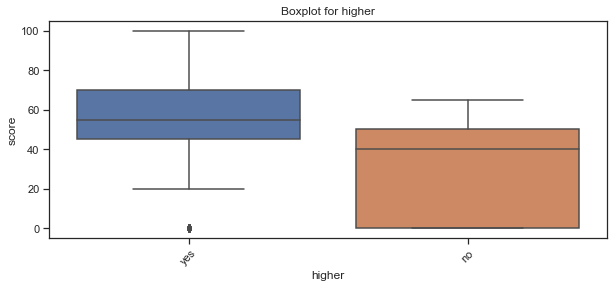

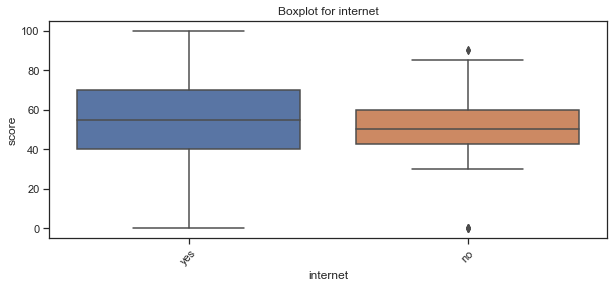

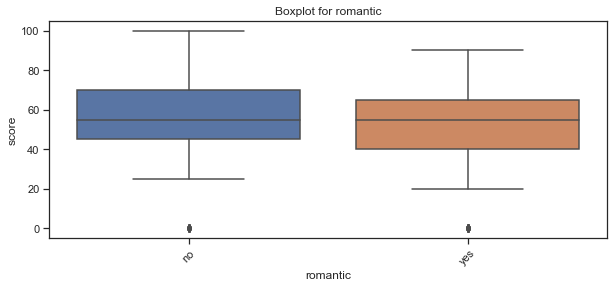

In [505]:
for col in nominative_columns:
    get_boxplot(col)

# Boxplot показал признаки, влияющие на score
school
address
Mjob
Fjob #однако можно сократить до "teacher" и "not_teacher"
schoolsup
higher


In [520]:
# создадим новый столбец 
df['Fjob_teacher'] = df.Fjob.apply(lambda x: 1 if x=='teacher' else 2)

In [533]:
#добавим его в наш список номинативных столбцов
nominative_columns = nominative_columns +['Fjob_teacher']


# Проверим, есть ли статистическая разница в распределении оценок по номинативным признакам, с помощью теста Стьюдента

In [534]:
def get_stat_dif(column):
    cols = df.loc[:, column].value_counts().index[:10]
    combinations_all = list(combinations(cols, 2))
    for comb in combinations_all:
        if ttest_ind(df.loc[df.loc[:, column] == comb[0], 'score'],
                     df.loc[df.loc[:, column] == comb[1], 'score']).pvalue \
                <= 0.05/len(combinations_all):  # Учли поправку Бонферони
            print('Найдены статистически значимые различия для колонки', column)
            break

In [535]:
for col in nominative_columns:
    get_stat_dif(col)
    

Найдены статистически значимые различия для колонки address
Найдены статистически значимые различия для колонки Mjob
Найдены статистически значимые различия для колонки higher
Найдены статистически значимые различия для колонки romantic


# Таким образом переменные, которые, возможно, оказывают влияние на оценку, это:


In [ ]:
itog = ['address', 'Mjob', 'higher', 'romantic', 'school', 'schoolsup',
        'Fjob_teacher', 'age', 'Medu', 'Fedu', 'studytime', 'failures', 'goout']

Итак, в результате EDA для анализа влияния условий жизни учащихся в возрасте от 15 до 22 лет на их успеваемость по математике были получены следующие выводы:

1. В данных достаточно мало пустых значений .
2. Выбросы найдены только в столбцах absences , famrel, Fedu и то это единичные выбросы, что позволяет сделать вывод о том, что данные достаточно чистые.
3. Выбросы famrel, Fedu заменены значениями пределов по условию.
4. Выбросы  absences выше значения 50, заменены на 50. 
5. Выявлена высокая корреляция между 'studytime' и  'studytime, granular', поэтому удалили 'studytime, granular'.
6. В целевой переменной 'score' пропусков было мало, и поэтому их удалили.
7. Создали новый столбец 'Fjob_teacher', поскольку только подпризнак 'teacher' отличался от других.
8. Используя высокую корреляцию между 'Medu', 'Fedu' заполнили пропуски в них.
9. Оставшиеся пропуски в таблице заполнили медианой для количественных признаков и модой для других признаков.
10. Из количественных признаков оставили для использования признаки с корреляцией к целевой функции >0.1
11. Из номинативных признаков с помощью boxplot и теста Стюдента также отобрали перспективные признаки.


Самые важные параметры, которые предлагается использовать в дальнейшем для построения модели, это:
'address', 'Mjob', 'higher', 'romantic', 'school', 'schoolsup', 'Fjob_teacher', 'age', 'Medu', 'Fedu', 'studytime', 'failures', 'goout'